In [19]:
import sys
import os
# Turn off warnings and errors due to TF libraries
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
import time
import datetime
import csv
from random import shuffle
import tensorflow as tf
# import internal scripts
from tools.tools import *
from test import test
from test_valuereturner import test_valuereturner
import configs
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import yaml

In [20]:
config = yaml.safe_load(open('/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/configs/test_CGNN.yaml'))

In [21]:
from qnetworks.CGNN import GNN

GNN.config = config

In [22]:
model = GNN()

In [23]:
tools.config = config

In [24]:
labels,preds=test_valuereturner(config, model, 'valid')

2022-12-02 11:59:10.360368 Starting testing the valid set with 5 subgraphs!
2022-12-02 11:59:56.215483: validation Test:  Loss: 0.7204,  AUC: 0.4877, Acc: 46.5101,  Precision: 0.4555 -- Elapsed: 0m45s


/Users/lucascurtin/Desktop/QGNN Repos/qtrkx-gnn-tracking/test_valuereturner.py:93: RuntimeWarning: invalid value encountered in long_scalars
  precision_7 = tp/(tp+fp) # also named purity


In [25]:
fpr, tpr, thresholds = metrics.roc_curve(labels,preds,pos_label=1 )
roc_auc=roc_auc_score(labels, preds)

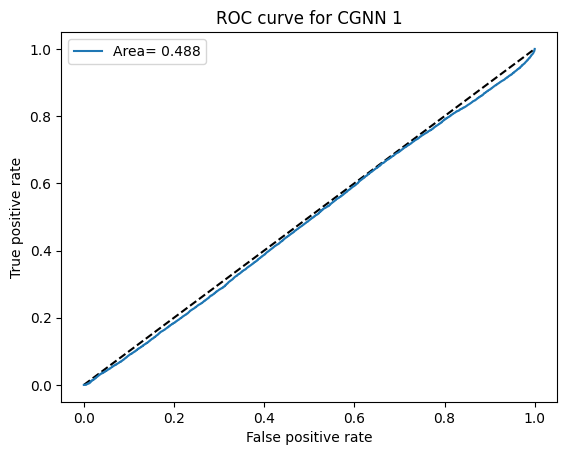

In [26]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Area= {:.3f}'.format(roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for CGNN 1')
plt.legend(loc='best')
plt.show()

#### Now going to try and develop confusion matrices.

In [15]:
preds_5=preds
preds_5[preds_5<0.5]=0
preds_5[preds_5>0.5]=1

In [16]:
cm_result = metrics.confusion_matrix(labels,preds_5)

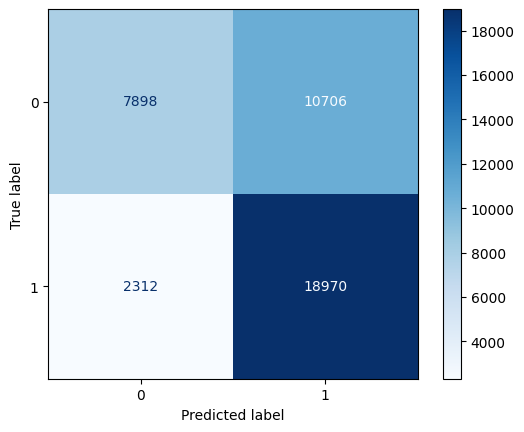

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_result)

print(disp)

disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Now going to try and develop histograms.

In [19]:
# So we would like to split our predictions into predictions made on 0 labels and 1 labels

labels_0=np.where(labels.numpy() == 0)[0]

preds_0=[] #The predictions on all our 0 labels

for i in range(len(labels_0)):

    index=labels_0[i] # grab our index
    guess=preds.numpy()[index] # find our prediction at the corresponding index
    preds_0.append(guess[0])
    



In [20]:
# So we would like to split our predictions into predictions made on 0 labels and 1 labels

labels_1=np.where(labels.numpy() == 1)[0]

preds_1=[] #The predictions on all our 1 labels

for i in range(len(labels_1)):


    index=labels_1[i] # grab our index
    guess=preds.numpy()[index] # find our prediction at the corresponding index
    preds_1.append(guess[0])
    



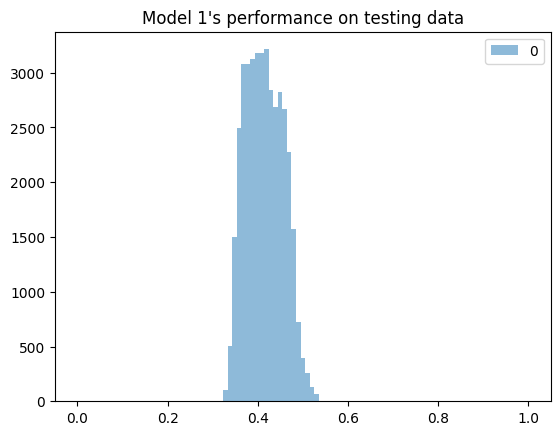

In [27]:
bins = np.linspace(0, 1, 100)

plt.hist(preds, bins, alpha=0.5, label='0')
#plt.hist(preds_1, bins, alpha=0.5, label='1')
plt.legend(loc='best')
plt.title("Model 1's performance on testing data")
plt.show()